In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import csv

In [26]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel, ylabel, legend ):
    
    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
        plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

SyntaxError: non-default argument follows default argument (873980451.py, line 2)

In [27]:
#initialize lists
Date= []
Open=[]
High=[]
Low=[]
Close=[]

with open('./AMZN.csv') as csvfile:

  # Initialize reader
  reader = csv.reader(csvfile, delimiter=',')

  # Skip the first line
  next(reader)

  # Append row and sunspot number to lists
  for row in reader:
    Date.append(int(row[0]))
    Open.append(float(row[2]))
    High.append(float(row[3]))
    Low.append(float(row[4]))
    Close.append(float(row[5]))

# Convert lists to numpy arrays
time = np.array(Date)
Open = np.array(Open)
High = np.array(High)
Low = np.array(Low)
Close= np.array(Close)


# plot_series(time, (Open, Close), xlabel='Day', ylabel='Daily Open Price')

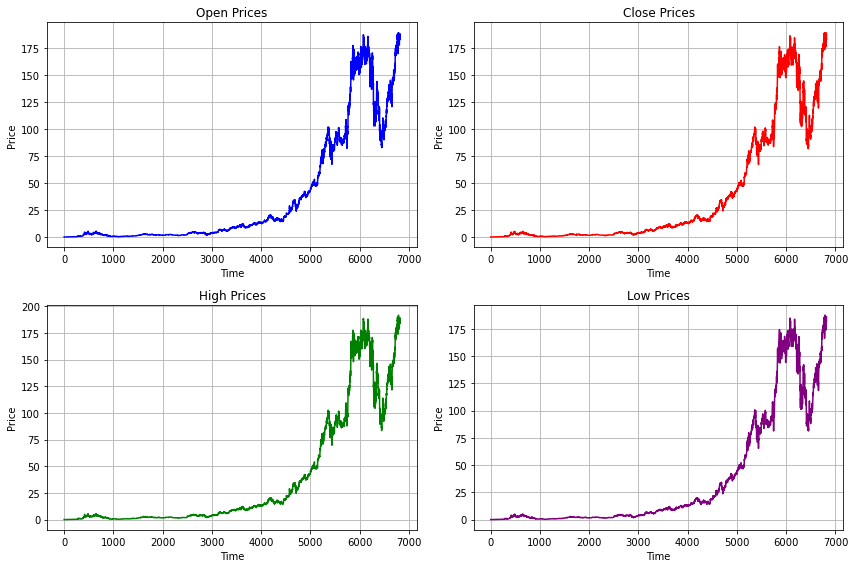

In [28]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Open prices
axs[0, 0].plot(time, Open, label='Open', color='blue')
axs[0, 0].set_title('Open Prices')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Price')
axs[0, 0].grid(True)

# Plot Close prices
axs[0, 1].plot(time, Close, label='Close', color='red')
axs[0, 1].set_title('Close Prices')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Price')
axs[0, 1].grid(True)

# Plot High prices
axs[1, 0].plot(time, High, label='High', color='green')
axs[1, 0].set_title('High Prices')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Price')
axs[1, 0].grid(True)

# Plot Low prices
axs[1, 1].plot(time, Low, label='Low', color='purple')
axs[1, 1].set_title('Low Prices')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Price')
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## Splitting the Dataset

In [4]:
# Define the split time
split_time = 6500

# Get the train set
time_train = time[:split_time]
x_train = Open[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = Open[split_time:]

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
#     for x,y in dataset:
#         print("x = ", x.numpy())
#         print("y = ", y.numpy())
#         print()
    return dataset

In [6]:
# Parameters
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

x =  [[0.946875 0.859375 0.80625  ... 0.822    0.7845   0.8125  ]
 [2.953125 2.910938 2.775    ... 3.3875   3.246875 3.28125 ]
 [1.891667 2.159375 2.2      ... 3.41875  3.49375  3.35    ]
 ...
 [4.384375 4.125    4.025    ... 4.075    4.26875  3.525   ]
 [1.484375 1.49375  1.7      ... 0.915625 0.94375  0.91875 ]
 [4.28125  4.484375 4.315625 ... 3.079688 2.889063 2.953125]]
y =  [0.786    3.184375 3.325    3.35     0.115104 1.804167 2.065625 0.9625
 0.725    4.607813 3.189063 0.6225   2.959375 1.61875  2.815625 0.408333
 0.203646 1.934375 3.246875 2.549609 0.809375 0.209896 0.940104 3.328125
 0.8335   1.153125 0.8395   2.898438 2.796875 3.565625 1.01875  2.910938]

x =  [[0.075521 0.077083 0.075781 ... 0.16901  0.2      0.224479]
 [0.221875 0.202083 0.204167 ... 0.225    0.234375 0.23125 ]
 [2.021875 1.871875 1.91875  ... 1.14375  1.225    1.328125]
 ...
 [0.320313 0.35625  0.341667 ... 0.357813 0.366667 0.363542]
 [0.728125 0.792188 0.7875   ... 0.5165   0.4355   0.4285  ]
 [1.00625  

x =  [[0.835  0.858  0.909  ... 0.9625 0.9595 0.9795]
 [2.445  2.4245 2.4065 ... 1.796  1.8    1.798 ]
 [1.9915 1.9775 2.071  ... 2.2565 2.2475 2.1335]
 ...
 [2.6335 2.731  2.7365 ... 2.2835 2.3155 2.31  ]
 [1.932  1.915  1.888  ... 3.445  3.4125 3.555 ]
 [2.013  1.9655 1.9565 ... 2.0095 1.9455 1.966 ]]
y =  [1.02     1.786    2.0785   0.712    1.80625  2.122    2.3275   0.622917
 1.865    2.4475   1.9295   1.6675   0.688    1.7595   0.5125   2.4545
 1.9655   1.7685   1.2125   1.767    1.9475   2.455    1.938    2.825
 1.761    1.922    1.736    2.0065   1.27     2.392    3.657    1.916   ]

x =  [[1.759375 1.625    1.5125   ... 0.8      0.83125  0.8375  ]
 [2.071    2.047    1.9915   ... 2.2375   2.25     2.2565  ]
 [0.93125  0.954167 0.914583 ... 0.90625  0.911979 0.896875]
 ...
 [1.798    1.786    1.775    ... 1.675    1.692    1.744   ]
 [2.4655   2.4415   2.4325   ... 1.782    1.8445   1.866   ]
 [1.9645   1.9115   1.987    ... 2.0905   2.069    2.097   ]]
y =  [0.790625 2.2475   

x =  [[ 9.933   9.955   9.917  ... 11.2195 11.1635 11.0645]
 [ 2.054   2.0665  2.0895 ...  2.238   2.196   2.192 ]
 [ 9.1415  9.314   9.1325 ...  9.6785 11.2415 11.1975]
 ...
 [11.7645 11.6965 11.654  ... 11.816  11.7115 11.7005]
 [11.3175 11.25   11.3125 ... 12.62   12.527  12.807 ]
 [ 2.3005  2.2775  2.2625 ...  2.306   2.344   2.05  ]]
y =  [11.25      1.885    11.47      9.325     9.684     1.3395   13.07
  6.4625   13.087     1.91      8.95      4.1015    6.3985    4.02
  8.506     6.5705    9.6785    0.217188  1.7495    3.5125    0.7415
  9.225     4.537     8.6335    4.032     6.8545    7.2275   11.5525
  8.714    11.602    12.77      1.982   ]

x =  [[ 9.3075    9.205     9.325    ...  8.59      8.5365    8.889   ]
 [ 0.358594  0.334896  0.363542 ...  1.089063  1.00625   1.009896]
 [ 7.992     7.9515    8.0005   ...  8.9205    8.9635    9.194   ]
 ...
 [ 3.75      3.677     3.595    ...  3.6865    3.61      3.65    ]
 [ 9.2085    9.3395    9.2065   ... 10.607    10.474    10.42

x =  [[14.699    15.2575   15.312    ... 15.404    15.591    15.315   ]
 [ 3.9125    3.876     3.9035   ...  4.598     4.613     4.625   ]
 [37.853001 37.685001 38.240501 ... 41.247501 41.965    41.638   ]
 ...
 [27.110001 27.7775   27.2875   ... 35.868999 35.731998 35.5065  ]
 [12.865    12.8575   12.414    ... 12.92     12.9025   12.8055  ]
 [53.477501 50.606998 50.952499 ... 50.279499 50.463501 49.5     ]]
y =  [15.4905    4.5025   41.562     5.9395   12.924    42.261501 10.764
 38.432499 48.920502 38.299999 29.806999 27.2875   23.115999 35.75
  9.2195   50.422001 27.775999 10.097     4.3145   15.7565   14.2295
 11.5      17.091    18.587999 49.75     53.477501 50.       38.1395
 12.414    35.494999 12.7275   49.676498]

x =  [[ 2.4655    2.471     2.445    ...  3.9       3.775     3.7665  ]
 [13.762    13.4835   13.249    ... 13.35     13.2905   13.3875  ]
 [19.200001 19.0425   19.1975   ... 21.030001 21.4      21.577499]
 ...
 [38.967999 37.8675   38.438499 ... 38.099998 37.620499

x =  [[156.75     152.712997 153.692505 ... 106.290001 107.599998 113.209999]
 [ 82.649002  82.050499  82.027496 ...  90.551003  91.335999  91.032501]
 [169.       171.250504 166.5      ... 167.399994 172.173492 171.740005]
 ...
 [134.720001 136.210007 140.580002 ... 114.790001 119.980003 119.650002]
 [ 37.685001  38.240501  38.3405   ...  41.965     41.638     41.562   ]
 [154.714005 148.25     144.022995 ... 110.239998 112.5      115.      ]]
y =  [113.849998  91.449997 175.255005 168.550003  92.567497  89.813004
 107.379997  70.158501 113.830002 170.100494 164.125     31.2675
  16.7435   157.552002  86.18     158.800507 107.599998 160.149506
  89.438499  21.514999  81.150002  96.648499  44.575001  83.3685
  75.68     148.25      31.857    151.5495    16.763    116.
  39.099998 115.699997]

x =  [[90.300003 91.447502 89.7995   ... 88.740501 88.012001 88.7995  ]
 [88.065002 88.554497 84.877502 ... 93.612503 94.149498 94.294502]
 [16.1985   16.6      16.653    ... 16.7355   17.3515   1

In [7]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 60, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 60, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 lambda (Lambda)             (None, 1)                 0

In [8]:
# Get initial weights
init_weights = model.get_weights()

In [9]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
202/202 [==============================] - 22s 86ms/step - loss: 34.3356 - lr: 1.0000e-08
Epoch 2/100
202/202 [==============================] - 14s 70ms/step - loss: 27.1711 - lr: 1.1220e-08
Epoch 3/100
202/202 [==============================] - 14s 67ms/step - loss: 22.8441 - lr: 1.2589e-08
Epoch 4/100
202/202 [==============================] - 14s 71ms/step - loss: 17.4981 - lr: 1.4125e-08
Epoch 5/100
202/202 [==============================] - 14s 69ms/step - loss: 8.7906 - lr: 1.5849e-08
Epoch 6/100
202/202 [==============================] - 13s 63ms/step - loss: 5.6765 - lr: 1.7783e-08
Epoch 7/100
202/202 [==============================] - 13s 62ms/step - loss: 4.4148 - lr: 1.9953e-08
Epoch 8/100
202/202 [==============================] - 13s 62ms/step - loss: 3.6689 - lr: 2.2387e-08
Epoch 9/100
202/202 [==============================] - 13s 66ms/step - loss: 3.1431 - lr: 2.5119e-08
Epoch 10/100
202/202 [==============================] - 12s 61ms/step - loss: 2.6489 - 

202/202 [==============================] - 20s 95ms/step - loss: 14.7814 - lr: 1.0000e-04
Epoch 82/100
202/202 [==============================] - 20s 96ms/step - loss: 21.1713 - lr: 1.1220e-04
Epoch 83/100
202/202 [==============================] - 20s 95ms/step - loss: 32.4153 - lr: 1.2589e-04
Epoch 84/100
202/202 [==============================] - 19s 95ms/step - loss: 24.4876 - lr: 1.4125e-04
Epoch 85/100
202/202 [==============================] - 19s 92ms/step - loss: 22.6176 - lr: 1.5849e-04
Epoch 86/100
202/202 [==============================] - 19s 94ms/step - loss: 52.9627 - lr: 1.7783e-04
Epoch 87/100
202/202 [==============================] - 20s 95ms/step - loss: 27.9559 - lr: 1.9953e-04
Epoch 88/100
202/202 [==============================] - 19s 93ms/step - loss: 36.7717 - lr: 2.2387e-04
Epoch 89/100
202/202 [==============================] - 19s 94ms/step - loss: 40.1824 - lr: 2.5119e-04
Epoch 90/100
202/202 [==============================] - 19s 93ms/step - loss: 45.1928 

(1e-08, 0.001, 0.0, 100.0)

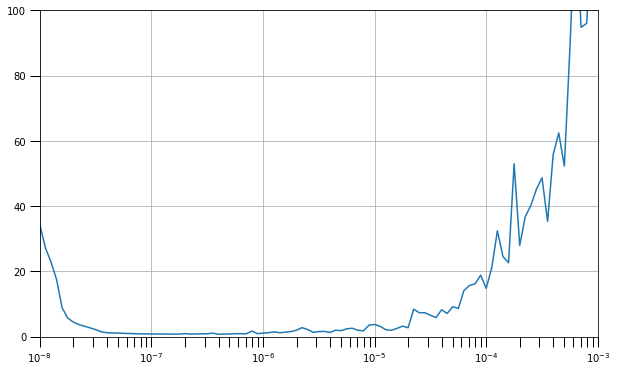

In [10]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 100])

In [11]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [12]:
# Set the learning rate
learning_rate = 2e-6

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [13]:
# Train the model
history = model.fit(train_set,epochs=100)

Epoch 1/100
202/202 [==============================] - 28s 94ms/step - loss: 3.3550 - mae: 3.7669
Epoch 2/100
202/202 [==============================] - 20s 96ms/step - loss: 1.5242 - mae: 1.9140
Epoch 3/100
202/202 [==============================] - 20s 95ms/step - loss: 1.5312 - mae: 1.8926
Epoch 4/100
202/202 [==============================] - 20s 96ms/step - loss: 1.1856 - mae: 1.5248
Epoch 5/100
202/202 [==============================] - 19s 94ms/step - loss: 0.9979 - mae: 1.3509
Epoch 6/100
202/202 [==============================] - 19s 95ms/step - loss: 1.1251 - mae: 1.4723
Epoch 7/100
202/202 [==============================] - 20s 96ms/step - loss: 0.9660 - mae: 1.3099
Epoch 8/100
202/202 [==============================] - 20s 96ms/step - loss: 1.0802 - mae: 1.4250
Epoch 9/100
202/202 [==============================] - 19s 94ms/step - loss: 0.9212 - mae: 1.2525
Epoch 10/100
202/202 [==============================] - 19s 94ms/step - loss: 1.1006 - mae: 1.4226
Epoch 11/100
202/20

202/202 [==============================] - 19s 92ms/step - loss: 0.6775 - mae: 0.9913
Epoch 84/100
202/202 [==============================] - 20s 95ms/step - loss: 0.6965 - mae: 0.9712
Epoch 85/100
202/202 [==============================] - 19s 94ms/step - loss: 0.6644 - mae: 0.9247
Epoch 86/100
202/202 [==============================] - 20s 95ms/step - loss: 0.6743 - mae: 0.9435
Epoch 87/100
202/202 [==============================] - 20s 95ms/step - loss: 0.6130 - mae: 0.8776
Epoch 88/100
202/202 [==============================] - 19s 93ms/step - loss: 0.7143 - mae: 1.0164
Epoch 89/100
202/202 [==============================] - 19s 94ms/step - loss: 0.7351 - mae: 1.0013
Epoch 90/100
202/202 [==============================] - 19s 93ms/step - loss: 0.7166 - mae: 0.9842
Epoch 91/100
202/202 [==============================] - 19s 92ms/step - loss: 0.7257 - mae: 1.0065
Epoch 92/100
202/202 [==============================] - 20s 95ms/step - loss: 0.7770 - mae: 1.0283
Epoch 93/100
202/202 [=

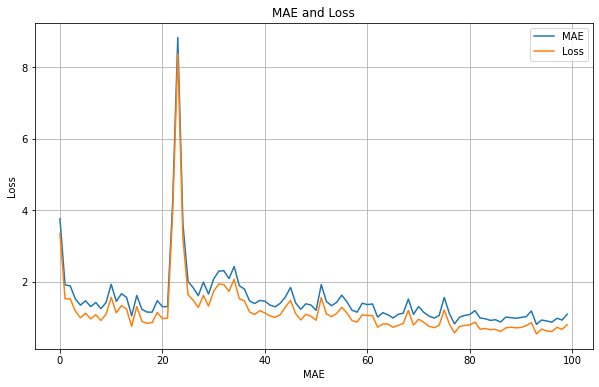

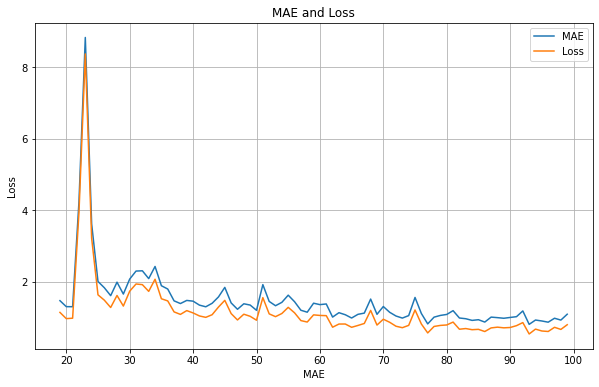

In [14]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [15]:
def model_forecast(model, series, window_size, batch_size):
    
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

10/10 [==============================] - 0s 37ms/step


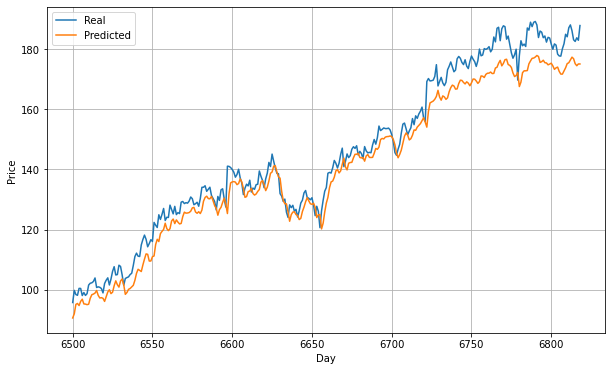

In [33]:
# Reduce the original series
forecast_series = Open[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results), xlabel= 'Day', ylabel= 'Price', legend=['Real', 'Predicted'])

# plt.legend()

In [17]:
# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

5.04277
